<a href="https://colab.research.google.com/github/kabi239/COVID-19-PANDEMIC-ANALYSIS/blob/main/Major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/owid-covid-data.xlsx'
df = pd.read_excel(path)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98899,ZWE,Africa,Zimbabwe,2021-06-24,44306.0,826.0,482.714,1709.0,17.0,8.857,2980.974,55.575,32.478,114.984,1.144,0.596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4888.0,619296.0,41.667,0.329,3978.0,0.268,0.121,8.2,tests performed,1193315.0,725582.0,467733.0,26466.0,9604.0,8.03,4.88,3.15,646.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
98900,ZWE,Africa,Zimbabwe,2021-06-25,45217.0,911.0,554.571,1721.0,12.0,9.286,3042.268,61.293,37.312,115.791,0.807,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1221917.0,737483.0,484434.0,28602.0,12931.0,8.22,4.96,3.26,870.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
98901,ZWE,Africa,Zimbabwe,2021-06-26,46018.0,801.0,627.143,1725.0,4.0,8.429,3096.160,53.892,42.195,116.061,0.269,0.567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1249508.0,747330.0,502178.0,27591.0,16513.0,8.41,5.03,3.38,1111.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.

In [ ]:
df1 = df[df['location'] == 'United States']
df2 = df[df['location'] == 'India']


In [ ]:
df1 = df1.rename(columns={df1.columns[3]:'ds',
                        df1.columns[5]:'y'})
df2 = df2.rename(columns={df2.columns[3]:'ds',
                        df2.columns[5]:'y'})
df_new1 = df1[['ds','y']]
df_new2 = df2[['ds','y']]
df_new1

,ds,y
93736,2020-01-22,NaN
93737,2020-01-23,0.0
93738,2020-01-24,1.0
93739,2020-01-25,0.0
93740,2020-01-26,3.0
...,...,...
94255,2021-06-24,12830.0
94256,2021-06-25,23715.0
94257,2021-06-26,7303.0
94258,2021-06-27,3920.0


In [ ]:
df_new1 = df_new1.dropna()
df_new2 = df_new2.dropna()

In [ ]:
df_new1['ds'] = pd.to_datetime(df_new1['ds'])
df_new1['y'] = df_new1['y'].astype(int)
df_new2['ds'] = pd.to_datetime(df_new2['ds'])
df_new2['y'] = df_new2['y'].astype(int)
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 40902 to 41417
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      516 non-null    datetime64[ns]
 1   y       516 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.1 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


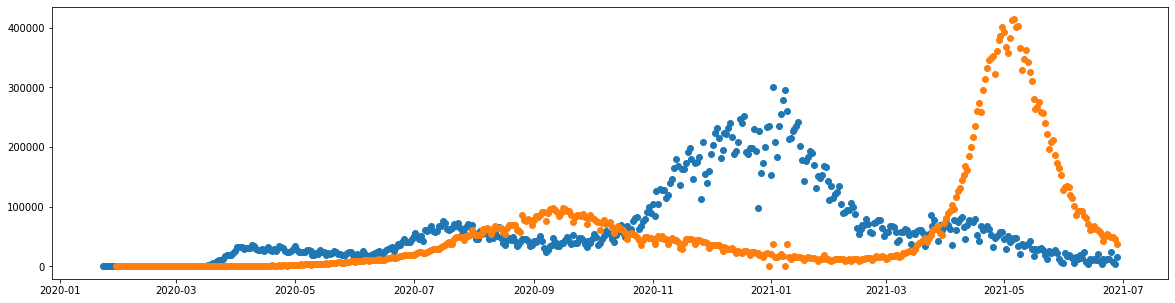

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(df_new1['ds'],df_new1['y'])
plt.scatter(df_new2['ds'],df_new2['y'])

In [ ]:
df_new3 = df_new1.tail(200)
df_new4 = df_new2.tail(200)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


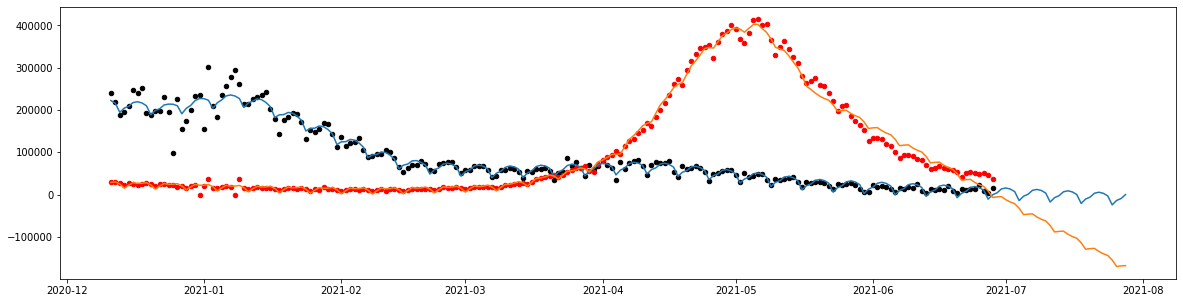

In [ ]:
from fbprophet import Prophet

model1 = Prophet(changepoint_prior_scale=0.4)
model1.fit(df_new3)
model2 = Prophet(changepoint_prior_scale=0.4)
model2.fit(df_new4)
x1 = model1.make_future_dataframe(periods=30,freq='D')
x2 = model2.make_future_dataframe(periods=30,freq='D')

forecast1 = model1.predict(x1)
forecast2 = model2.predict(x2)
plt.figure(figsize=(20,5))
plt.scatter(df_new3['ds'],df_new3['y'],s=20,c='k')
plt.scatter(df_new4['ds'],df_new4['y'],s=20,c='r')
plt.plot(forecast1['ds'],forecast1['yhat'])
plt.plot(forecast2['ds'],forecast2['yhat'])

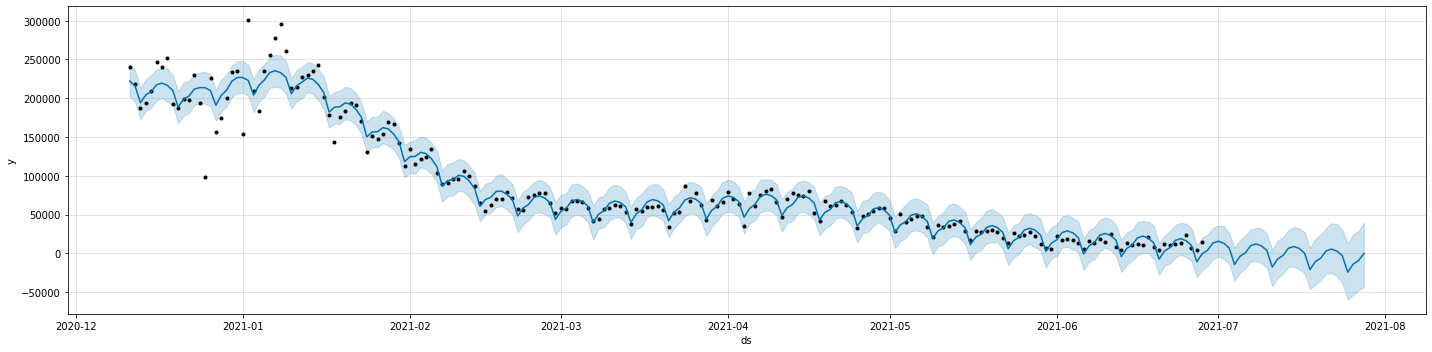

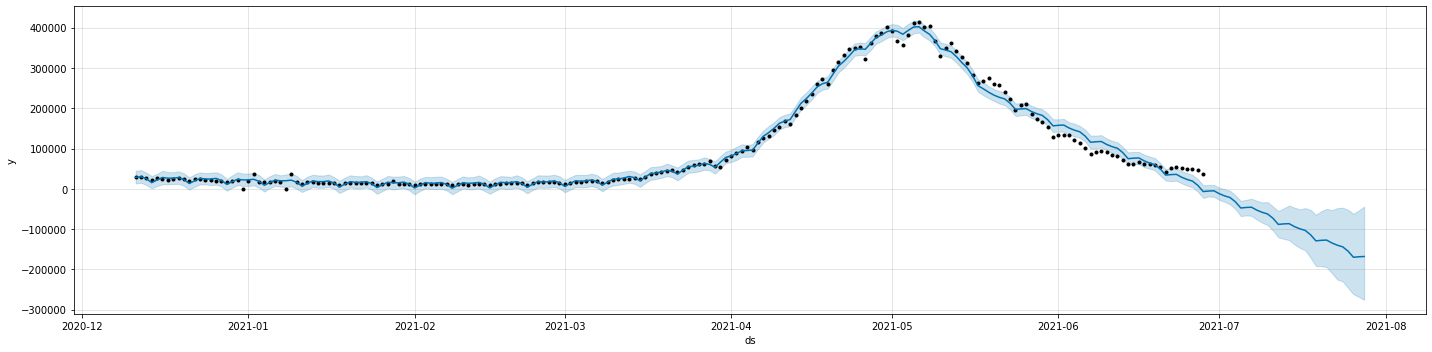

In [ ]:
model1.plot(forecast1,figsize=(20,5));
model2.plot(forecast2,figsize=(20,5));

In [ ]:
column = forecast1["yhat"]
column1 = forecast2["yhat"]
max_value1 = column1.max()
max_value = column.max()

low_value1 = column1.min()
low_value = column.min()
print("Predicted output are also considered. thats why i am getting negative values, if i dont consider them its 0 cases for both countries\n\n\n")
if (max_value1 > max_value):
  print("Highest cases =",max_value1)
  print("Country = India")
else:
  print("Highest cases =",max_value)
  print("Country = USA")

if (low_value1 < low_value):
  print("Lowest cases =",low_value1)
  print("Country = India")
else: 
  print("lowest cases =",low_value)
  print("Country = USA")


Predicted output are also considered. thats why i am getting negative values, if i dont consider them its 0 cases for both countries



Highest cases = 402415.7077705299
Country = India
Lowest cases = -169977.2422406111
Country = India
